<a href="https://colab.research.google.com/github/Danieldotcomcoder/Linear-Regression-Python/blob/main/Bigmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

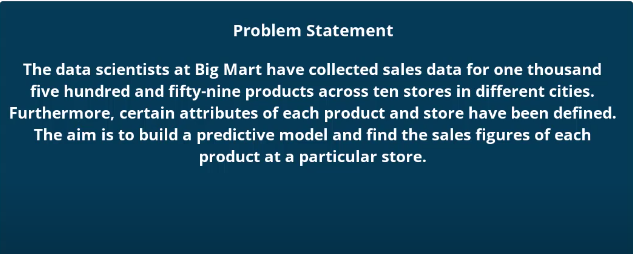

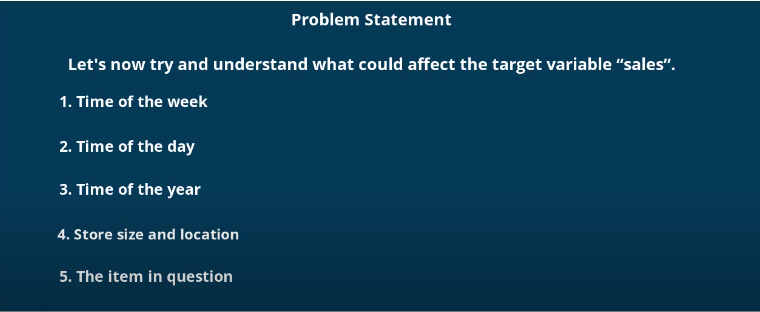

In [ ]:
# Import The Required Libraries
import pandas as pd
import numpy as np

#Import the sklearn libraries for label encoder and linear regression
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#Import matplot library for visualization
import matplotlib.pyplot as plt

%matplotlib inline


In [ ]:
# Load the train and test datasets in pandas Dataframe
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [ ]:
# Check the number of rows and columns present in train dataset
train.shape


(8523, 12)

In [ ]:
# Print the number of columns in train dataset
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
# Check the number of rows and columns present in test dataset
test.shape

(5681, 11)

In [ ]:
# Print the number of columns in test dataset
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [ ]:
# combine test and train into one file to perform EDA

train["source"] = "train"
test["source"] = "test"
data = pd.concat([train,test], ignore_index = True)
print(data.shape)

(14204, 13)


In [ ]:
# return first five elements
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [ ]:
# Describe function for numerical data summary

data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
# checking for missing values

data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

We will predict the missing values using the model

In [ ]:
# print the unique values in the Item_fat_content column, where there are only two unique types of fat content in items: low fat and regular
data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [ ]:
# print the unique values in the Outlet_Establishent_Year column, where the data range from 1985 to 2009
data["Outlet_Establishment_Year"].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [ ]:
# Calculate the outlet age
data["Outlet_Age"] = 2018 - data["Outlet_Establishment_Year"]
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,9


In [ ]:
# unique values in outlet size
data["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [ ]:
 # print the count values in the Item_fat_content column
 data["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Print the count values of outlet sizw
data["Outlet_Size"].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [ ]:
# Use the mode function to find out the most common value in the Outlet_size
data["Outlet_Size"].mode()[0]

'Medium'

In [ ]:
#Two variables with missing values- Item Weight and Outlet Size
#Replacing missing values in Outlet Size with the value "medium"
data["Outlet_Size"] = data["Outlet_Size"].fillna(data["Outlet_Size"].mode()[0])

In [ ]:
#Replacing missing values in Item weight with the mean weight
data["Item_Weight"] = data["Item_Weight"].fillna(data["Item_Weight"].mean())

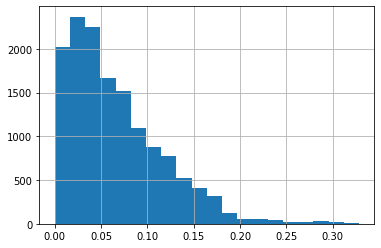

In [ ]:
# Plot a histogram to reveal the distribution of Item_Visibilty column
data["Item_Visibility"].hist(bins=20)

In [ ]:
# Detecting Outliers
# An outlier is a data point that lies outside the overall pattern in a distribution
# A commonly used rule states that a data point is an outlier if it is more than 1.5(IQR) above the third quantile or below the first quantile
# Using this, one can remove the outliers and output the resulting data in fill-data variable.

# calculate the first quantile for Item_visibility
Q1 = data["Item_Visibility"].quantile(0.25)

In [ ]:
# calculate the second quantile for Item_visibility
Q3 = data["Item_Visibility"].quantile(0.75)

In [ ]:
# calulate the interquantile range (IQR)
IQR = Q3 - Q1

In [ ]:
# now that the IQR is known, remove the outliers from the data
# The resulting data is stored in fill-data variable
fill_data = data.query('(@Q1 - 1.5 * @IQR) <= Item_Visibility <= (@Q3 + 1.5 * @IQR)')

In [ ]:
# Display the data 
fill_data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,9


In [ ]:
# check the shape of the resulting dataset without the outliers
fill_data.shape

(13943, 14)

In [ ]:
# shape of the original data
data.shape

(14204, 14)

In [ ]:
# Assign fill data dataset to data dataframe
data = fill_data

In [ ]:
data.shape

(13943, 14)

In [ ]:
# Modify Item_visibility by converting the numerical values into the categories Low Visibility, Visibility, and High Visibility
data["Item_Visibility_bins"] = pd.cut(data["Item_Visibility"], [0.000, 0.065, 0.13, 0.2], labels = ['Low viz', 'Viz', 'High Viz'])

<ipython-input-36-0b878c8af62c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Item_Visibility_bins"] = pd.cut(data["Item_Visibility"], [0.000, 0.065, 0.13, 0.2], labels = ['Low viz', 'Viz', 'High Viz'])


In [ ]:
# Print the count of Item_Visibilty_bins
data["Item_Visibility_bins"].value_counts()

Low viz     7363
Viz         4283
High Viz    1418
Name: Item_Visibility_bins, dtype: int64

In [ ]:
# Replace null values with low visibility
data["Item_Visibility_bins"] = data["Item_Visibility_bins"].replace(np.nan, "Low Viz", regex=True)

<ipython-input-38-310eaf62fad0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Item_Visibility_bins"] = data["Item_Visibility_bins"].replace(np.nan, "Low Viz", regex=True)


In [ ]:
# we found typos and difference in representations in categories of Item_Fat_Content
# This can be corrected using code on screen

# Replace all other representations of low fat with Low fat
data["Item_Fat_Content"] = data["Item_Fat_Content"].replace(["low fat", "LF"], "Low Fat")

In [ ]:
# Replace all representations of reg with Regular
data["Item_Fat_Content"] = data["Item_Fat_Content"].replace("reg", "Regular")

In [ ]:
# print unique fat count values
data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [ ]:
# code all categorical variables as numeric using 'LabelEncoder' from sklearn's preprocessing module
# Initialize the label encoder
le = LabelEncoder()

In [ ]:
# Transform Item Fat_content
data["Item_Fat_Content"] = le.fit_transform(data["Item_Fat_Content"])

In [ ]:
# Transform Item_Visibility_bins
data["Item_Visibility_bins"] = le.fit_transform(data["Item_Visibility_bins"])

In [ ]:
# Transform Outlet_Size
data["Outlet_Size"] = le.fit_transform(data["Outlet_Size"])

In [ ]:
# Transform Outlet_Location_Type
data["Outlet_Location_Type"] = le.fit_transform(data["Outlet_Location_Type"])

In [ ]:
# print the unique values of outlet_type
data["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [ ]:
#  create dummies for outlet types
dummy = pd.get_dummies(data["Outlet_Type"])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [ ]:
# Explore the column Item_Identifier

data["Item_Identifier"]

0        FDA15
1        DRC01
2        FDN15
3        FDX07
4        NCD19
         ...  
14199    FDB58
14200    FDD47
14201    NCO17
14202    FDJ26
14203    FDU37
Name: Item_Identifier, Length: 13943, dtype: object

In [ ]:
# As there are multiples values of food, nonconsumable items, and drinks with different numbers, combine the item type
data["Item_Identifier"].value_counts()

FDE33    10
FDM12    10
FDY47    10
FDT03    10
FDO01    10
         ..
FDA10     7
FDO33     7
FDZ60     7
NCW54     7
FDG21     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [ ]:
#As multiples categories are present, reduce my mapping

data["Item_Type_Combined"] = data["Item_Identifier"].apply(lambda x: x[0:2])
data["Item_Type_Combined"] = data["Item_Type_Combined"].map({'FD': 'Food',
                                                             'NC': 'Non-Consumable',
                                                             'Dr': 'Drinks'})


In [ ]:
# Only three are present

data["Item_Type_Combined"].value_counts()

Food              9991
Non-Consumable    2652
Name: Item_Type_Combined, dtype: int64

In [ ]:
data.shape

(13943, 16)

In [ ]:
# perform one hot-encoding for all columns
data = pd.get_dummies(data, columns=["Item_Fat_Content", "Outlet_Location_Type", "Outlet_Size", "Outlet_Type", "Item_Type_Combined"])

In [ ]:
data.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_Type                             object
Item_MRP                             float64
Outlet_Identifier                     object
Outlet_Establishment_Year              int64
Item_Outlet_Sales                    float64
source                                object
Outlet_Age                             int64
Item_Visibility_bins                   int64
Item_Fat_Content_0                     uint8
Item_Fat_Content_1                     uint8
Outlet_Location_Type_0                 uint8
Outlet_Location_Type_1                 uint8
Outlet_Location_Type_2                 uint8
Outlet_Size_0                          uint8
Outlet_Size_1                          uint8
Outlet_Size_2                          uint8
Outlet_Type_Grocery Store              uint8
Outlet_Type_Supermarket Type1          uint8
Outlet_Type_Supermarket Type2          uint8
Outlet_Typ

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Drop the columns which have been converted to different types

data.drop(['Item_Type', 'Outlet_Establishment_Year'], axis=1, inplace=True)
# Divide the dataset created earlier into train and test datasets

train = data.loc[data['source'] == "train"]
test = data.loc[data['source'] == "test"]

# Drop unnecessary columns

test.drop(["Item_Outlet_Sales", "source"], axis=1, inplace=True)
train.drop(["source"], axis=1, inplace=True)

# Export modified version of the files
train.to_csv("train_modified.csv", index=False)
test.to_csv("test_modified.csv", index=False)

In [ ]:
# Read the train_modified.csv and test_modified.csv dataset
train2 = pd.read_csv("train_modified.csv") 
test2 = pd.read_csv("test_modified.csv") 

In [ ]:
# print the data types of train2 columns
train2.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_MRP                             float64
Outlet_Identifier                     object
Item_Outlet_Sales                    float64
Outlet_Age                             int64
Item_Visibility_bins                   int64
Item_Fat_Content_0                     int64
Item_Fat_Content_1                     int64
Outlet_Location_Type_0                 int64
Outlet_Location_Type_1                 int64
Outlet_Location_Type_2                 int64
Outlet_Size_0                          int64
Outlet_Size_1                          int64
Outlet_Size_2                          int64
Outlet_Type_Grocery Store              int64
Outlet_Type_Supermarket Type1          int64
Outlet_Type_Supermarket Type2          int64
Outlet_Type_Supermarket Type3          int64
Item_Type_Combined_Food                int64
Item_Type_Combined_Non-Consumable      int64
dtype: obj

In [ ]:
# Drop the irrelevant variables from train2 dataset
# Create the independent variable X-train and dependent variable Y-train
X_train = train2.drop(["Item_Outlet_Sales", "Outlet_Identifier", "Item_Identifier"],axis=1)
y_train = train2.Item_Outlet_Sales

In [ ]:
# Drop those irrelevant variables from test2 dataset

X_test = test2.drop(["Outlet_Identifier", "Item_Identifier"], axis=1)

In [ ]:
X_test

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,20.750000,0.007565,107.8622,19,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0
1,8.300000,0.038428,87.3198,11,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0
2,14.600000,0.099575,241.7538,20,2,1,0,0,0,1,0,1,0,1,0,0,0,0,1
3,7.315000,0.015388,155.0340,11,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0
4,12.792854,0.118599,234.2300,33,2,1,0,0,0,1,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,10.500000,0.013496,141.3154,21,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0
5564,7.600000,0.142991,169.1448,9,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0
5565,10.000000,0.073529,118.7440,16,2,1,0,0,1,0,0,1,0,0,1,0,0,0,1
5566,15.300000,0.000000,214.6218,11,3,1,0,0,1,0,0,1,0,0,1,0,0,1,0


In [ ]:
X_train.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,9.30,0.016047,249.8092,19,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0
1,5.92,0.019278,48.2692,9,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0


In [ ]:
y_train.head(2)

0    3735.1380
1     443.4228
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
# Import sklearn libraries for model selection
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [ ]:
# Create a train and test split
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [ ]:
# fit linear regression to the training dataset
ln = LinearRegression()

In [ ]:
ln.fit(xtrain, ytrain)

LinearRegression()

In [ ]:
# find the coeffiecnt and intercept
# use xtrain and ytrain for linear regression

print(ln.coef_)
ln.intercept_

[-1.83221184e+00 -3.50627888e+02  1.58796350e+01 -3.21374352e+01
 -3.90620495e+00  1.17202019e+02 -1.17202019e+02  1.90734421e+02
  4.75931531e+01 -2.38327574e+02  5.44047683e+02 -3.13434302e+02
 -2.30613382e+02 -1.63350167e+03 -1.28971436e+02 -3.48575261e+02
  2.11104837e+03  3.33189289e+01 -5.35355025e+01]


842.0637009774089

In [ ]:
# predict the results of the training data
predictions = ln.predict(xtest)
predictions

array([2085.74905676, 3708.29413566, 2961.31376131, ..., 3550.53765811,
       3469.73509339, 1252.0172495 ])

In [ ]:
import math

In [ ]:
# find RMSE for the model
print(math.sqrt(mean_squared_error(ytest, predictions)))

1127.6552847624969


In [ ]:
# A good RMSE for this problem is 1130, we can improve the RMSE by using algorithms like decision trees, random forest and XGboost

In [ ]:
# Predict the column Item_Outlet_sales of test dataset
y_sales_pred = ln.predict(X_test)
y_sales_pred

array([1798.53738344, 1363.87541071, 1847.20362039, ..., 1830.41435255,
       3612.62466274, 1288.76822546])

In [ ]:
test_predictions = pd.DataFrame({
    'Item_Identifier': test2['Item_Identifier'],
    'Outlet_Identifier': test2['Outlet_Identifier'],
    'Item_Outlet_Sales': y_sales_pred
} ,columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']
)

In [ ]:
test_predictions

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1798.537383
1,FDW14,OUT017,1363.875411
2,NCN55,OUT010,1847.203620
3,FDQ58,OUT017,2683.439171
4,FDY38,OUT027,5137.986826
...,...,...,...
5563,FDB58,OUT046,2365.008414
5564,FDD47,OUT018,2424.906872
5565,NCO17,OUT045,1830.414353
5566,FDJ26,OUT017,3612.624663
